In [103]:
import xml.etree.ElementTree as ET
import tifffile as tif
import shutil
import os
import time
from cv2 import cv2
import matplotlib.pyplot as plt
import os

In [104]:
#数据集准备：本实验利用Swin-Transformer来实现对SAR飞机的类型分类，因此首先应从原SAR图像中把飞机部分裁剪出来作为数据集

def crop(start,end,x_dir,y_dir):
    # for i in range(1,3):
    name_list = open('G:/深度学习数据集/SAR图像/trainData/classes.txt')
    class_names = name_list.readlines()
    class_names = [c.strip() for c in class_names]
    point_list = []
    print(class_names)
    list_file = open(y_dir, 'r+',encoding="utf-8")
    list_file.truncate(0)
    shutil.rmtree(x_dir)
    os.makedirs(x_dir)
    obj_count = 0;
    
    for i in range(start, end):#1300张图片作为TrainSet
        img = tif.imread('G:/深度学习数据集/SAR图像/trainData/Images/%s.jpg' % i)
        in_file = open('G:/深度学习数据集/SAR图像/trainData/gt/%s.xml' % i)
        tree = ET.parse(in_file)
        root = tree.getroot()
        name = 0
        if(i==2):
            tif.imwrite('G:/深度学习数据集/SAR图像/trainData/croped_train/show0.jpg', img)
        for obj in root.iter('object'):
            for obj1 in obj.iter('possibleresult'):
                if obj1.find('name').text not in class_names:
                    print("Error! Found new class class name " + obj1.find('name').text)
                else:
                    if(obj1.find('name').text=='Boeing787'):
                        name=1
                    elif(obj1.find('name').text=='other'):
                        name=2
                    elif (obj1.find('name').text == 'A220'):
                        name = 3
                    elif (obj1.find('name').text == 'ARJ21'):
                        name = 4
                    elif (obj1.find('name').text == 'Boeing737-800'):
                        name = 5
                    elif (obj1.find('name').text == 'A320/321'):
                        name = 6
                    elif (obj1.find('name').text == 'A330'):
                        name = 7
            j = 0;
            for element in obj.iter():
                if element.tag == "point":
                    print(str(j) + " " + element.tag + " " + element.text)
                    point_list.append(element.text.split(',')[0])
                    point_list.append(element.text.split(',')[1])
                    j = j + 1
            x_min = str(point_list[0].split(".")[0])  # 去零
            x_max = str(point_list[2].split(".")[0])
            y_min = str(point_list[1].split(".")[0])
            y_max = str(point_list[5].split(".")[0])
            croped = img[int(y_min):int(y_max),int(x_min):int(x_max)]
            obj_count += 1
            tif.imwrite(x_dir+'%s.jpg' % obj_count, croped)
            if(i==2):
                cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 255, 255), 3)
            print('这是一个 '+obj1.find('name').text+' 类别号 '+str(name))
            #写入标注信息
            list_file.write(str(name)+'\n')
            #print(point_list)
            point_list.clear()
        if(i==2):
            tif.imwrite('G:/深度学习数据集/SAR图像/trainData/croped_train/show1.jpg', img)

In [105]:
#制作训练集
crop(1,1601,'G:/深度学习数据集/SAR图像/trainData/croped_train/','G:/深度学习数据集/SAR图像/trainData/swin_classification_train.txt')

['Boeing787', 'other', 'A220', 'ARJ21', 'Boeing737-800', 'A320/321', 'A330']
0 point 1.000000,265.000000
1 point 44.000000,265.000000
2 point 44.000000,357.000000
3 point 1.000000,357.000000
4 point 1.000000,265.000000
这是一个 Boeing787 类别号 1
0 point 147.000000,105.000000
1 point 239.000000,105.000000
2 point 239.000000,173.000000
3 point 147.000000,173.000000
4 point 147.000000,105.000000
这是一个 other 类别号 2
0 point 145.000000,1.000000
1 point 252.000000,1.000000
2 point 252.000000,73.000000
3 point 145.000000,73.000000
4 point 145.000000,1.000000
这是一个 A220 类别号 3
0 point 157.000000,228.000000
1 point 239.000000,228.000000
2 point 239.000000,293.000000
3 point 157.000000,293.000000
4 point 157.000000,228.000000
这是一个 other 类别号 2
0 point 242.000000,879.000000
1 point 307.000000,879.000000
2 point 307.000000,936.000000
3 point 242.000000,936.000000
4 point 242.000000,879.000000
这是一个 ARJ21 类别号 4
0 point 312.000000,882.000000
1 point 383.000000,882.000000
2 point 383.000000,934.000000
3 point 312

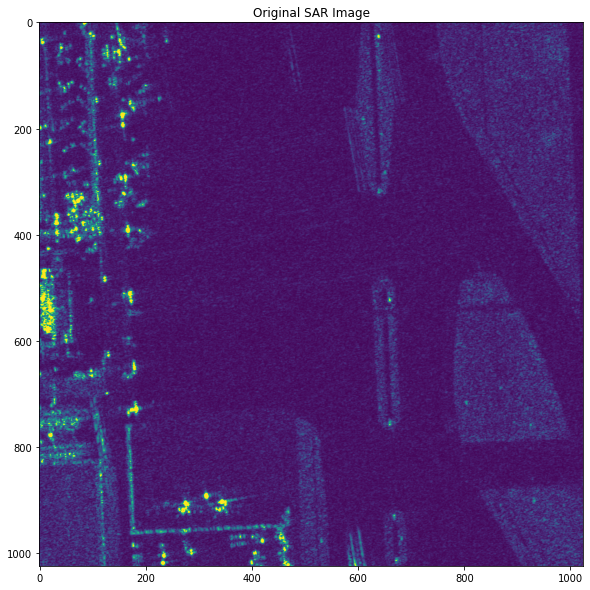

In [97]:
fig = plt.figure(figsize=(10, 10))
img= tif.imread('G:/深度学习数据集/SAR图像/trainData/croped_train/show0.jpg')
plt.title("Original SAR Image")
plt.imshow(img)

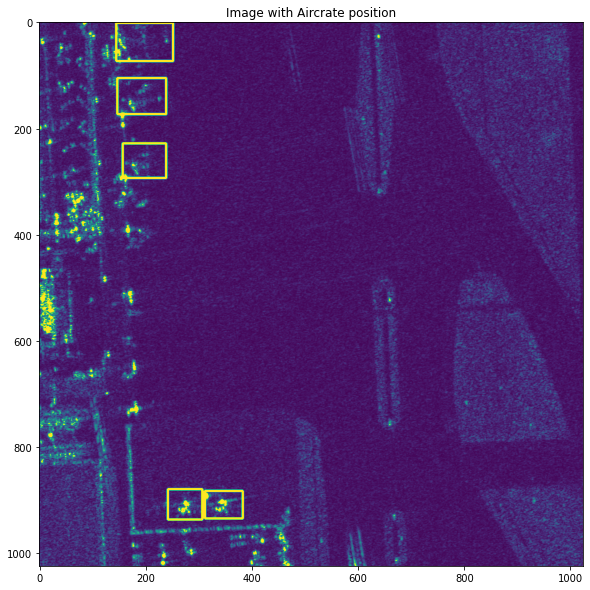

In [98]:
fig = plt.figure(figsize=(10, 10))
img= tif.imread('G:/深度学习数据集/SAR图像/trainData/croped_train/show1.jpg')
plt.title("Image with Aircrate position")
plt.imshow(img)

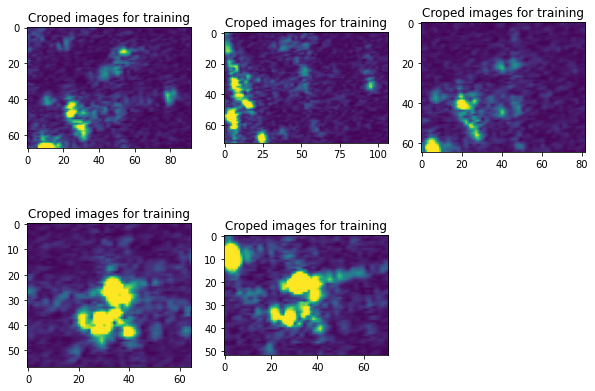

In [99]:
fig = plt.figure(figsize=(10, 7))
for k in range(2,7):
                fig.add_subplot(2, 3, k-1)
                img1= tif.imread('G:/深度学习数据集/SAR图像/trainData/croped_train/%s.jpg'%k)
                plt.title("Croped images for training")
                plt.imshow(img1)

In [50]:

#制作测试集
crop(1601,1901,'G:/深度学习数据集/SAR图像/trainData/croped_test/','G:/深度学习数据集/SAR图像/trainData/swin_classification_test.txt',False)

['Boeing787', 'other', 'A220', 'ARJ21', 'Boeing737-800', 'A320/321', 'A330']
['Boeing787', 'other', 'A220', 'ARJ21', 'Boeing737-800', 'A320/321', 'A330']


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>